In [27]:
import numpy as np
import pandas as pd 
import scipy as sp 
import matplotlib.pyplot as plt 
from plotnine import *
from sklearn import preprocessing

In [4]:
from sklearn.decomposition import PCA

In [5]:
book_ratings_df = pd.read_csv("/Users/shivasaivummaji/Downloads/BX-CSV-Dump/BX-Book-Ratings.csv", encoding="latin-1", sep=";")

In [6]:
book_ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
books_df = pd.read_csv("/Users/shivasaivummaji/Downloads/BX-CSV-Dump/BX-Books.csv", encoding="latin-1", sep=";", on_bad_lines='skip')

/var/folders/zw/1p1g2scn1llcnl481zdq41wm0000gn/T/ipykernel_1045/4252955550.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.


In [7]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [8]:
users_df = pd.read_csv("/Users/shivasaivummaji/Downloads/BX-CSV-Dump/BX-Users.csv", encoding="latin-1", sep=";")

In [9]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [9]:
book_ratings_df.replace(0, pd.NA, inplace=True)

In [10]:
mean_rate = book_ratings_df.groupby('ISBN')['Book-Rating'].transform('mean')

In [11]:
book_ratings_df['Book-Rating'].fillna(mean_rate, inplace=True)

In [12]:
book_ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,6.285714
1,276726,0155061224,5.000000
2,276727,0446520802,8.410714
3,276729,052165615X,3.000000
4,276729,0521795028,6.000000


In [13]:
# Selecting subset of data 
book_ratings_df = book_ratings_df.groupby('ISBN').filter(lambda x: len(x) >= 200)

In [14]:
book_ratings_df.head()

,User-ID,ISBN,Book-Rating
29,276755,0451166892,5.000000
84,276788,043935806X,7.000000
164,276832,0316781266,6.792683
173,276847,0446364193,8.034483
392,276896,0440241537,10.000000


In [15]:
book_ratings_df = book_ratings_df.groupby("User-ID").filter(lambda x: len(x) >= 5)

In [16]:
book_ratings_df

,User-ID,ISBN,Book-Rating
796,277042,0061097101,7.481928
799,277042,0312983271,6.920354
800,277042,0380731851,7.701923
801,277042,0446605484,7.000000
802,277042,0446611212,8.000000
...,...,...,...
1149493,276680,0316666343,7.000000
1149516,276680,0375727345,8.000000
1149523,276680,0385335482,7.803681
1149530,276680,0385504209,8.000000


In [17]:
ratings_mtx = book_ratings_df.pivot_table(index='User-ID', columns='ISBN', values='Book-Rating')

In [19]:
ratings_mtx

ISBN,0060392452,0060502258,0060915544,0060928336,0060930535,0060934417,0060938455,0060959037,0060976845,0060977493,...,0804114986,080411868X,0805063897,0842329129,0971880107,1400031354,1400034779,155874262X,1558743669,1573229326
User-ID,,,,,,,,,,,,,,,,,,,,,
243,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
254,NaN,NaN,NaN,NaN,8.178899,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507,7.803797,NaN,NaN,NaN,NaN,8.150943,8.415584,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN


In [20]:
ratings_mtx.fillna(ratings_mtx.mean(), inplace=True)


In [21]:
ratings_mtx

ISBN,0060392452,0060502258,0060915544,0060928336,0060930535,0060934417,0060938455,0060959037,0060976845,0060977493,...,0804114986,080411868X,0805063897,0842329129,0971880107,1400031354,1400034779,155874262X,1558743669,1573229326
User-ID,,,,,,,,,,,,,,,,,,,,,
243,8.006036,7.773606,10.000000,7.980328,8.186782,8.187947,8.338757,8.238509,7.598622,7.00000,...,7.946715,7.604412,8.23081,7.880333,4.337852,8.498947,8.114488,5.000000,7.854015,6.766979
254,8.006036,7.773606,8.575933,7.980328,8.178899,8.187947,8.338757,8.238509,7.598622,7.60407,...,7.946715,7.604412,8.23081,7.880333,4.337852,8.498947,8.114488,7.842203,7.854015,6.766979
388,8.006036,7.773606,8.575933,7.980328,8.186782,8.187947,8.338757,8.238509,3.000000,7.60407,...,7.946715,7.604412,8.23081,7.880333,4.337852,8.498947,8.114488,7.842203,7.854015,6.766979
507,7.803797,7.773606,8.575933,7.980328,8.186782,8.150943,8.415584,8.238509,7.598622,7.60407,...,7.946715,7.604412,8.23081,7.880333,4.337852,8.498947,8.114488,7.842203,7.854015,6.766979
638,8.006036,7.773606,8.575933,7.980328,8.186782,8.187947,8.338757,8.238509,7.598622,7.60407,...,7.946715,7.600000,8.23081,7.880333,4.337852,8.498947,8.114488,7.842203,7.854015,6.766979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278418,8.006036,7.773606,8.575933,7.980328,8.186782,8.187947,8.338757,8.238509,7.598622,7.60407,...,7.946715,7.604412,8.23081,7.880333,4.337852,8.498947,8.114488,7.842203,7.854015,6.766979
278535,8.006036,7.773606,8.575933,7.980328,8.186782,8.187947,8.338757,8.238509,7.598622,7.60407,...,7.946715,7.604412,8.23081,7.880333,4.337852,8.498947,8.114488,7.842203,7.854015,6.766979
278582,8.006036,7.773606,8.575933,7.980328,8.186782,8.187947,8.338757,8.238509,7.598622,7.60407,...,7.946715,7.604412,8.23081,7.880333,4.337852,8.498947,10.000000,7.842203,7.854015,6.766979


In [22]:
num_users = book_ratings_df.groupby('ISBN')['User-ID'].nunique()
top3books = num_users.sort_values(ascending=False).head(3)
top3books

ISBN
0971880107    699
0316666343    625
0385504209    455
Name: User-ID, dtype: int64

In [23]:
merged_parta = pd.merge(top3books, books_df[["ISBN", "Book-Title"]], on='ISBN')
merged_parta.columns = ['ISBN', 'Times Rated', 'Book Title']
print(merged_parta)

         ISBN  Times Rated                 Book Title
0  0971880107          699                Wild Animus
1  0316666343          625  The Lovely Bones: A Novel
2  0385504209          455          The Da Vinci Code


In [24]:
# Top 3 users in terms of most number of books they have rated
num_books = book_ratings_df.groupby('User-ID')['ISBN'].nunique()
top3users = num_books.sort_values(ascending=False).head(3)
top3users

User-ID
11676    193
35859    121
16795    119
Name: ISBN, dtype: int64

In [25]:
merged_partb = pd.merge(top3users, users_df[["User-ID", "Location"]], on='User-ID')
merged_partb.columns = ['User-ID', "Number of Books Rated", 'Location']
print(merged_partb)


   User-ID  Number of Books Rated                       Location
0    11676                    193                  n/a, n/a, n/a
1    35859                    121         duluth, minnesota, usa
2    16795                    119  mechanicsville, maryland, usa


Clustering (15 pts)

In [27]:
from sklearn.cluster import KMeans

In [28]:
ratings_mtx = ratings_mtx.transpose()

/Users/shivasaivummaji/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/Users/shivasaivummaji/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/Users/shivasaivummaji/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/Users/shivasaivummaji/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/Users/shivasaivummaji/miniconda3/lib/py

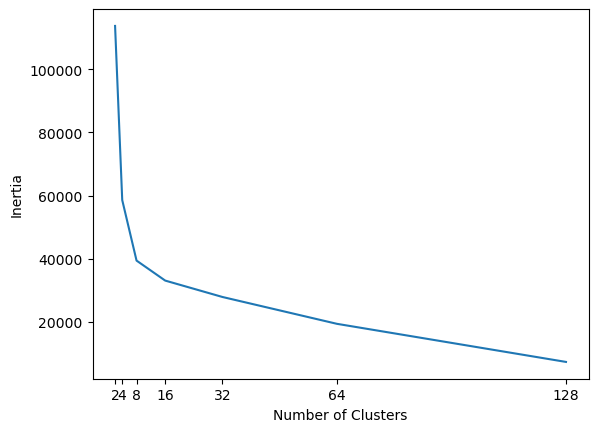

In [29]:
# a)
k_vals = [2, 4, 8, 16, 32, 64, 128]
inertia = []
for k in k_vals:
    kmeans = KMeans(n_clusters = k).fit(ratings_mtx)
    inertia.append(kmeans.inertia_)

plt.plot(k_vals, inertia)
plt.xticks(k_vals)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

I was having a similar problem as another student who posted on EdDiscussion, where the elbow-point is not clear from the k-values. As a result, I transposed the matrix and repeated the same process, and I was able to clearly see an elbow point. 

n = 8 as the elbow of the inertia graph, so it is clear that 8 is the ideal number of clusters. 

In [30]:
inertia

[113745.87096054666,
 58570.95039332278,
 39398.32623756583,
 33066.92831166368,
 27870.45417173596,
 19364.671065332994,
 7295.077485375994]

In [31]:
ratings_mtx = ratings_mtx.transpose()

In [32]:
# c)
kmeans = KMeans(n_clusters = 8)
cen = kmeans.fit_predict(ratings_mtx.T)


cluster_df = pd.DataFrame({"ISBN": ratings_mtx.columns, "Cluster": cen})
cluster_books = books_df.merge(cluster_df, on="ISBN")

mean2 = ratings_mtx.mean(axis=0)
cluster_books['mean'] = cluster_books['ISBN'].apply(lambda x: mean2[x])

for i in range(8):
    bks = cluster_books[cluster_books["Cluster"] == i]
    top3books_3 = bks.nlargest(3, 'mean')
    print("Top 3 books in cluster", i + 1)
    print(top3books_3[['Book-Title', 'mean']], "\n")



/Users/shivasaivummaji/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


Top 3 books in cluster 1
                                            Book-Title      mean
28                       Digital Fortress : A Thriller  7.692523
0                                        The Testament  7.688101
154  Sophie's World: A Novel About the History of P...  7.686271 

Top 3 books in cluster 2
                                            Book-Title      mean
180  Harry Potter and the Prisoner of Azkaban (Book 3)  9.026005
170  Harry Potter and the Order of the Phoenix (Boo...  9.004230
105  Harry Potter and the Sorcerer's Stone (Harry P...  8.993908 

Top 3 books in cluster 3
                                            Book-Title      mean
129                           I Know This Much Is True  8.370240
39                 The Red Tent (Bestselling Backlist)  8.349602
45   Fast Food Nation: The Dark Side of the All-Ame...  8.338757 

Top 3 books in cluster 4
    Book-Title      mean
1  Wild Animus  4.337852 

Top 3 books in cluster 5
                                     

In [80]:
cluster_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Cluster,mean
0,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,0,7.688101
1,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,3,4.337852
2,0345402871,Airframe,Michael Crichton,1997,Ballantine Books,http://images.amazon.com/images/P/0345402871.0...,http://images.amazon.com/images/P/0345402871.0...,http://images.amazon.com/images/P/0345402871.0...,0,7.551769
3,0345417623,Timeline,MICHAEL CRICHTON,2000,Ballantine Books,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...,4,7.869109
4,0446310786,To Kill a Mockingbird,Harper Lee,1988,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,1,8.988047
...,...,...,...,...,...,...,...,...,...,...
189,0440212561,Outlander,DIANA GABALDON,1992,Dell,http://images.amazon.com/images/P/0440212561.0...,http://images.amazon.com/images/P/0440212561.0...,http://images.amazon.com/images/P/0440212561.0...,1,8.546788
190,080411868X,"Welcome to the World, Baby Girl!",Fannie Flagg,1999,Ballantine Books,http://images.amazon.com/images/P/080411868X.0...,http://images.amazon.com/images/P/080411868X.0...,http://images.amazon.com/images/P/080411868X.0...,0,7.604412
191,080411109X,The Hundred Secret Senses,Amy Tan,1996,Ivy Books,http://images.amazon.com/images/P/080411109X.0...,http://images.amazon.com/images/P/080411109X.0...,http://images.amazon.com/images/P/080411109X.0...,4,7.895530
192,0061097101,The Saving Graces: A Novel,Patricia Gaffney,2000,HarperTorch,http://images.amazon.com/images/P/0061097101.0...,http://images.amazon.com/images/P/0061097101.0...,http://images.amazon.com/images/P/0061097101.0...,0,7.513438


Principle Component Analysis (15 pts)

In [90]:
# a)
ratings_mtx_t = ratings_mtx.transpose()
centered_mtx_scaled = ratings_mtx_t.apply(lambda col: col - col.mean(), axis=0)
centered_mtx_scaled

User-ID,243,254,388,507,638,805,882,1075,1131,1424,...,277639,277965,278137,278144,278221,278418,278535,278582,278633,278843
ISBN,,,,,,,,,,,,,,,,,,,,,
0060392452,0.186040,0.182130,0.214953,-0.025123,0.133400,0.182772,0.125650,0.205694,0.207599,0.203525,...,0.185507,0.170081,0.191366,0.184903,0.173146,0.191381,0.156571,0.182927,0.201578,0.182773
0060502258,-0.046390,-0.050300,-0.017477,-0.055315,-0.099030,-0.049658,-0.109301,-0.026736,-0.024831,-0.028905,...,-0.046923,-0.062348,-0.041064,-0.047526,-0.059284,-0.041048,-0.075859,-0.049503,-0.030851,-0.049657
0060915544,2.180004,0.752026,0.784849,0.747012,0.703297,0.752669,0.640982,0.775590,0.777495,0.773421,...,0.755403,0.739978,0.761263,0.754800,0.743042,0.761278,0.726468,0.752824,0.771475,0.752670
0060928336,0.160332,0.156422,0.189245,0.151407,0.107692,-0.823264,0.099942,0.179986,0.181891,0.177817,...,0.159799,0.144374,0.165658,0.066368,0.147438,0.165673,0.130863,0.157219,0.175870,0.157065
0060930535,0.366786,0.354993,0.395699,0.357861,0.314146,0.363518,0.306396,0.386440,0.388345,-0.802511,...,0.366253,0.350827,0.372112,0.357767,0.346009,0.372127,0.337317,0.363673,0.382324,0.363519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400031354,0.678951,0.675041,0.707864,0.670027,0.626312,0.675684,0.618562,0.698605,0.700510,0.696436,...,0.678418,0.662993,0.684278,0.677815,0.666057,0.684293,0.649483,0.675838,0.694490,0.675684
1400034779,0.294492,0.290581,0.323404,0.285567,0.241852,0.291224,0.234102,-2.800342,0.316050,0.311976,...,0.293958,0.278533,0.299818,0.293355,0.281597,0.299833,0.265023,2.176891,0.310030,0.291225
155874262X,-2.819996,0.018297,0.051120,0.013282,-0.030433,0.018939,-0.038183,0.041861,0.043766,0.039692,...,0.021674,0.006248,0.027533,0.021070,0.009313,0.027548,-0.007262,0.019094,0.037745,0.018940


In [96]:
# b)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
p_res = pca.fit_transform(centered_mtx_scaled)
components = pca.components_
num_components = pca.n_components_
variance = pca.explained_variance_ratio_
print("Components: ", components)
print("Variance: ", variance)
print("Number of components: ", num_components)
pca_datab = pd.DataFrame(data = p_res, columns = ['PC1', 'PC2'])
pca_datab["ISBN"] = ratings_mtx_t.index
pca_datab

Components:  [[-0.01959177 -0.01936542 -0.01972967 ... -0.01917403 -0.01958995
  -0.01843309]
 [-0.00310623 -0.00175745  0.00403309 ... -0.00050463  0.02608432
   0.00153424]]
Variance:  [0.8213621  0.00375797]
Number of components:  2


,PC1,PC2,ISBN
0,-9.570832,-0.216747,0060392452
1,2.545636,-0.638726,0060502258
2,-39.162596,-0.250702,0060915544
3,-8.271942,-0.030859,0060928336
4,-18.988509,-1.215271,0060930535
...,...,...,...
190,-35.183560,-0.200793,1400031354
191,-15.200642,-0.611058,1400034779
192,-1.032842,0.965753,155874262X
193,-1.632789,-0.019610,1558743669


In [99]:
# c) Performing PCA on users
users_pca_mtx = ratings_mtx.apply(lambda row: row - row.mean(), axis=1)
users_pca = PCA(n_components=2)
users_res = users_pca.fit_transform(users_pca_mtx)
pca_users_df = pd.DataFrame(data = users_res, columns = ['PC1', 'PC2'])
pca_users_df["User-ID"] = ratings_mtx.index
pca_users_df

,PC1,PC2,User-ID
0,0.059427,0.211434,243
1,0.043863,-0.042646,254
2,-0.147617,-0.121657,388
3,-0.040726,0.068249,507
4,-0.756979,2.134475,638
...,...,...,...
2697,0.011495,0.015279,278418
2698,0.084971,-0.022870,278535
2699,0.012021,0.033077,278582
2700,-0.706722,0.481914,278633


In [105]:
users_df["Country"] = users_df["Location"].apply(lambda x: x.split(", ")[-1])
users_df

,User-ID,Location,Age,Country
0,1,"nyc, new york, usa",NaN,usa
1,2,"stockton, california, usa",18.0,usa
2,3,"moscow, yukon territory, russia",NaN,russia
3,4,"porto, v.n.gaia, portugal",17.0,portugal
4,5,"farnborough, hants, united kingdom",NaN,united kingdom
...,...,...,...,...
278853,278854,"portland, oregon, usa",NaN,usa
278854,278855,"tacoma, washington, united kingdom",50.0,united kingdom
278855,278856,"brampton, ontario, canada",NaN,canada
278856,278857,"knoxville, tennessee, usa",NaN,usa


In [112]:
country_counts2 = pd.merge(pca_users_df, users_df, on="User-ID")
country_counts2

,PC1,PC2,User-ID,Location,Age,Country
0,0.059427,0.211434,243,"arden hills, minnesota, usa",NaN,usa
1,0.043863,-0.042646,254,"minneapolis, minnesota, usa",24.0,usa
2,-0.147617,-0.121657,388,"nashville, tennessee, usa",35.0,usa
3,-0.040726,0.068249,507,"dumas, arkansas, usa",NaN,usa
4,-0.756979,2.134475,638,"san diego, california, usa",20.0,usa
...,...,...,...,...,...,...
2697,0.011495,0.015279,278418,"omaha, nebraska, usa",NaN,usa
2698,0.084971,-0.022870,278535,"oshkosh, wisconsin, usa",NaN,usa
2699,0.012021,0.033077,278582,"slidell, louisiana, usa",NaN,usa
2700,-0.706722,0.481914,278633,"sandy, utah, usa",NaN,usa


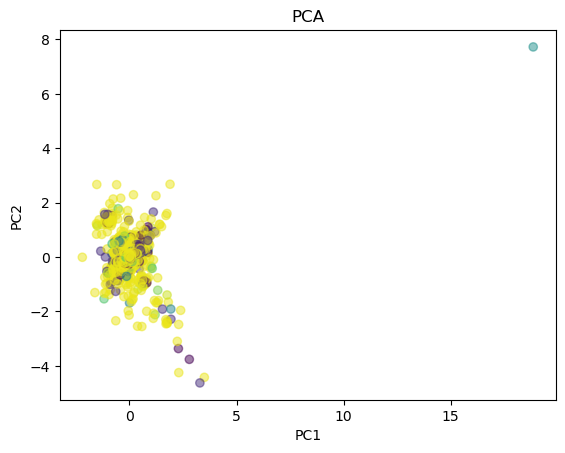

2702


In [119]:
country_counts2["Country_1"] = pd.Categorical(country_counts2["Country"]).codes
plt.scatter(country_counts2["PC1"], country_counts2["PC2"], c=country_counts2["Country_1"], alpha=0.5)
plt.title("PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [125]:
# d) How many components are needed to explain 80% of the variance in the data?
pca_80 = PCA(n_components=0.8)
p80_res = pca_80.fit(users_pca_mtx)
components80 = pca_80.components_
numcomponents80 = pca_80.n_components_
variance = pca_80.explained_variance_ratio_
print("Components: ", components)
print("Number of components: ", numcomponents80)

Components:  [[-0.01959177 -0.01936542 -0.01972967 ... -0.01917403 -0.01958995
  -0.01843309]
 [-0.00310623 -0.00175745  0.00403309 ... -0.00050463  0.02608432
   0.00153424]]
Number of components:  109


In [126]:
pca_40 = PCA(n_components=0.4)
p40_res = pca_40.fit(users_pca_mtx)
components40 = pca_40.components_
numcomponents40 = pca_40.n_components_
variance = pca_40.explained_variance_ratio_
print("Components: ", components)
print("Number of components: ", numcomponents40)

Components:  [[-0.01959177 -0.01936542 -0.01972967 ... -0.01917403 -0.01958995
  -0.01843309]
 [-0.00310623 -0.00175745  0.00403309 ... -0.00050463  0.02608432
   0.00153424]]
Number of components:  35


Singular Value Decomposition (15 pts)

In [127]:
ratings_mtx 

ISBN,0060392452,0060502258,0060915544,0060928336,0060930535,0060934417,0060938455,0060959037,0060976845,0060977493,...,0804114986,080411868X,0805063897,0842329129,0971880107,1400031354,1400034779,155874262X,1558743669,1573229326
User-ID,,,,,,,,,,,,,,,,,,,,,
243,8.006036,7.773606,10.000000,7.980328,8.186782,8.187947,8.338757,8.238509,7.598622,7.00000,...,7.946715,7.604412,8.23081,7.880333,4.337852,8.498947,8.114488,5.000000,7.854015,6.766979
254,8.006036,7.773606,8.575933,7.980328,8.178899,8.187947,8.338757,8.238509,7.598622,7.60407,...,7.946715,7.604412,8.23081,7.880333,4.337852,8.498947,8.114488,7.842203,7.854015,6.766979
388,8.006036,7.773606,8.575933,7.980328,8.186782,8.187947,8.338757,8.238509,3.000000,7.60407,...,7.946715,7.604412,8.23081,7.880333,4.337852,8.498947,8.114488,7.842203,7.854015,6.766979
507,7.803797,7.773606,8.575933,7.980328,8.186782,8.150943,8.415584,8.238509,7.598622,7.60407,...,7.946715,7.604412,8.23081,7.880333,4.337852,8.498947,8.114488,7.842203,7.854015,6.766979
638,8.006036,7.773606,8.575933,7.980328,8.186782,8.187947,8.338757,8.238509,7.598622,7.60407,...,7.946715,7.600000,8.23081,7.880333,4.337852,8.498947,8.114488,7.842203,7.854015,6.766979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278418,8.006036,7.773606,8.575933,7.980328,8.186782,8.187947,8.338757,8.238509,7.598622,7.60407,...,7.946715,7.604412,8.23081,7.880333,4.337852,8.498947,8.114488,7.842203,7.854015,6.766979
278535,8.006036,7.773606,8.575933,7.980328,8.186782,8.187947,8.338757,8.238509,7.598622,7.60407,...,7.946715,7.604412,8.23081,7.880333,4.337852,8.498947,8.114488,7.842203,7.854015,6.766979
278582,8.006036,7.773606,8.575933,7.980328,8.186782,8.187947,8.338757,8.238509,7.598622,7.60407,...,7.946715,7.604412,8.23081,7.880333,4.337852,8.498947,10.000000,7.842203,7.854015,6.766979


In [128]:
ratings_mtx2 = book_ratings_df.pivot_table(index='User-ID', columns='ISBN', values='Book-Rating')
ratings_mtx2.fillna(0, inplace=True)
ratings_mtx2

ISBN,0060392452,0060502258,0060915544,0060928336,0060930535,0060934417,0060938455,0060959037,0060976845,0060977493,...,0804114986,080411868X,0805063897,0842329129,0971880107,1400031354,1400034779,155874262X,1558743669,1573229326
User-ID,,,,,,,,,,,,,,,,,,,,,
243,0.000000,0.0,10.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
254,0.000000,0.0,0.0,0.0,8.178899,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
388,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,3.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,7.803797,0.0,0.0,0.0,0.000000,8.150943,8.415584,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,7.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278418,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278535,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278582,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0


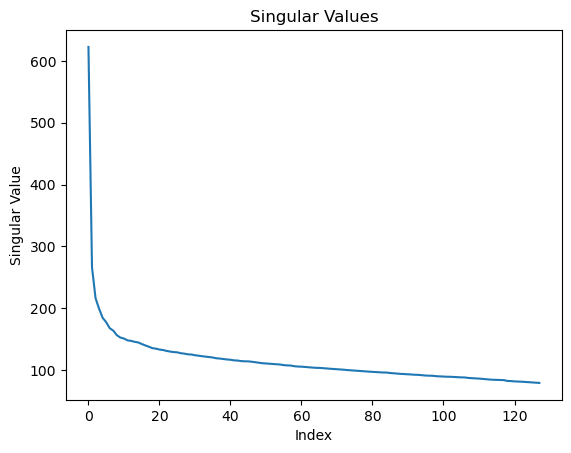

In [129]:
# a) Apply SVD to the ratings matrix with k = 128
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=128)
svd_res = svd.fit(ratings_mtx2)
components_svd = svd.components_
components_svd
singular_values1 = svd.singular_values_
plt.plot(singular_values1)
plt.title("Singular Values")
plt.xlabel("Index")
plt.ylabel("Singular Value")
plt.show()


In [137]:
# b) 
k = [2, 4, 8, 16, 32, 64, 128]
variances = []
for i in k:
    svd = TruncatedSVD(n_components=i)
    svd.fit(ratings_mtx2.T)
    variances.append(svd.explained_variance_ratio_.sum())
variances

[0.056903031573006746,
 0.09922855307037522,
 0.15790545501689526,
 0.24327504045319828,
 0.37497441971491896,
 0.5728430128979463,
 0.8399597440293454]

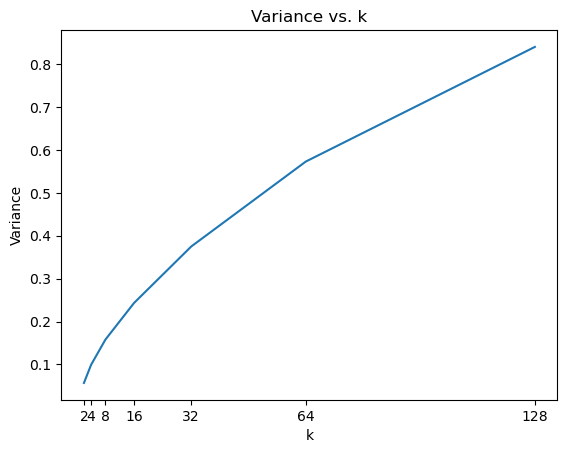

In [138]:
# Plot variances
plt.plot(k, variances)
plt.title("Variance vs. k")
plt.xlabel("k")
plt.xticks(k)
plt.ylabel("Variance")
plt.show()


In [75]:
# c)
svd2 = TruncatedSVD(n_components = 2)
svd2_res = svd2.fit_transform(ratings_mtx2.T)
svd2_res

array([[ 2.84330153e+01, -1.15329120e+01],
       [ 4.55786703e+01, -1.33101332e+00],
       [ 3.75589230e+01, -1.20488353e+01],
       [ 9.25152864e+01, -1.70374408e+01],
       [ 6.14678240e+01, -2.57153065e+01],
       [ 4.88666844e+01, -2.56831612e+01],
       [ 3.47955898e+01, -1.39274103e+01],
       [ 2.38841329e+01, -1.18852672e+01],
       [ 5.75669053e+01, -2.16741943e+01],
       [ 2.36772324e+01, -1.17260070e+01],
       [ 4.26644727e+01, -2.03829839e+01],
       [ 3.15191914e+01, -1.24299845e+01],
       [ 3.59031581e+01, -1.39719964e+01],
       [ 4.11282212e+01,  2.96945386e+00],
       [ 5.02069792e+01,  1.34728243e+01],
       [ 3.27582470e+01, -4.08177500e+00],
       [ 2.06519345e+01, -1.15569232e+01],
       [ 3.02038269e+01, -4.05100891e+00],
       [ 4.15241282e+01, -8.85189669e+00],
       [ 3.64959543e+01, -1.08034286e+01],
       [ 3.41833657e+01, -6.23965438e+00],
       [ 4.32025867e+01, -1.27782530e+01],
       [ 4.32326804e+01, -2.22244254e+01],
       [ 2.

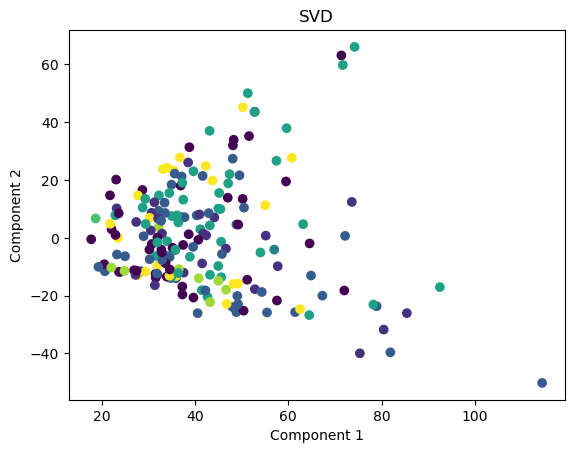

In [77]:
plt.scatter(svd2_res[:, 0], svd2_res[:, 1], c = cen)
plt.title("SVD")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()